# Preparation

In [1]:
%load_ext ipycache
import iminuit
import joblib
%load_ext line_profiler
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import numba
import numpy as np
import pandas as pd
import pymp
%load_ext rpy2.ipython
import scipy as sp
from scipy import optimize
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook')

%load_ext watermark
%watermark
%watermark -p pandas,scipy

/home/fabrost/miniconda3/envs/spols190117/lib/python3.6/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/fabrost/miniconda3/envs/spols190117/lib/python3.6/site-packages/ipycache.py:17: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Unicode


2019-03-06T12:03:42+01:00

CPython 3.6.8
IPython 7.2.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.4.172-86-default
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
pandas 0.23.4
scipy 1.2.0


In [2]:
cachedir = '/scratch/cache/'

In [3]:
results = pd.DataFrame()

# atmospheric C14

In [4]:
xp = np.array([ 1891.5, 1892.5, 1893.5, 1894.5, 1895.5, 1896.5, 1897.5, 1898.5, 1899.5, 1900.5, 1901.5, 1902.5, 1903.5, 1904.5, 1905.5, 1906.5, 1907.5, 1908.5, 1909.5, 1910.5, 1911.5, 1912.5, 1913.5, 1914.5, 1915.5, 1916.5, 1917.5, 1918.5, 1919.5, 1920.5, 1921.5, 1922.5, 1923.5, 1924.5, 1925.5, 1926.5, 1927.5, 1928.5, 1929.5, 1930.5, 1931.5, 1932.5, 1933.5, 1934.5, 1935.5, 1936.5, 1937.5, 1938.5, 1939.5, 1940.5, 1941.5, 1942.5, 1943.5, 1944.5, 1945.5, 1946.5, 1947.5, 1948.5, 1949.5, 1950.5, 1951.5, 1952.5, 1953.5, 1954.5, 1955.5, 1956.5, 1957.5, 1958.5, 1959.5, 1960.5, 1961.5, 1962.5, 1963.5, 1964.5, 1965.5, 1966.5, 1967.5, 1968.5, 1969.5, 1970.5, 1971.5, 1972.5, 1973.5, 1974.5, 1975.5, 1976.5, 1977.5, 1978.5, 1979.5, 1980.5, 1981.5, 1982.5, 1983.5, 1984.5, 1985.5, 1986.5, 1987.5, 1988.5, 1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5, 1995.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5, 2003.963938,  2004.421821,  2004.879704, 2005.337587,  2005.79547 ,  2006.253353,  2006.711236, 2007.169119,  2007.627002,  2008.084885,  2008.542768, 2009.000651,  2009.458534,  2009.916417,  2010.3743  , 2010.3743  ,  2010.626   ,  2011.125   ,  2011.626   , 2012.125   ,  2012.626   ,  2013.125   ,  2013.626   , 2014.125   ,  2014.626   ,  2015.125   ,  2015.625   , 2016.125   ,  2016.625   ,  2020.      ])
fp = np.array([-0.002     , -0.002     , -0.002     , -0.002     , -0.002     , -0.00233   , -0.00267   , -0.003     , -0.00333   , -0.00367   , -0.004     , -0.00433   , -0.00467   , -0.005     , -0.00533   , -0.00567   , -0.006     , -0.00633   , -0.00667   , -0.007     , -0.00733   , -0.00767   , -0.008     , -0.00833   , -0.00867   , -0.009     , -0.00933   , -0.00967   , -0.01      , -0.01033   , -0.01067   , -0.011     , -0.01133   , -0.01167   , -0.012     , -0.01233   , -0.01267   , -0.013     , -0.01333   , -0.01367   , -0.014     , -0.01433   , -0.01467   , -0.015     , -0.01533   , -0.01567   , -0.016     , -0.01633   , -0.01667   , -0.0202    , -0.0194    , -0.0196    , -0.0225    , -0.0217    , -0.0221    , -0.0216    , -0.0211    , -0.0223    , -0.0246    , -0.0248    , -0.0248    , -0.0249    , -0.0239    , -0.0211    , -0.0082    , 0.0265    ,  0.073     ,  0.1402    ,  0.228     ,  0.2123    , 0.2216    ,  0.3585    ,  0.7183    ,  0.8357    ,  0.7563    , 0.6919    ,  0.6236    ,  0.5645    ,  0.5454    ,  0.5291    , 0.4994    ,  0.4656    ,  0.4186    ,  0.4008    ,  0.3698    , 0.3525    ,  0.3339    ,  0.3258    ,  0.2958    ,  0.2645    , 0.2567    ,  0.2383    ,  0.2242    ,  0.2093    ,  0.2013    , 0.1911    ,  0.1826    ,  0.1734    ,  0.1635    ,  0.1525    , 0.1429    ,  0.1364    ,  0.1284    ,  0.1221    ,  0.1155    , 0.1099    ,  0.1043    ,  0.0981    ,  0.09      ,  0.0866    , 0.0807    ,  0.0749    ,  0.0689    ,  0.06349874,  0.06145905, 0.0597412 ,  0.05822747,  0.05641489,  0.05479531,  0.05364811, 0.05205465,  0.05067073,  0.04927897,  0.04788014,  0.04647508, 0.04506462,  0.04364948,  0.04223027,  0.04223027,  0.0403    , 0.0347    ,  0.0371    ,  0.0312    ,  0.0299    ,  0.0193    , 0.0219    ,  0.0182    ,  0.018     ,  0.0116    ,  0.0129    , 0.0096    ,  0.0097    ,  0.0097    ])
C_atm = lambda x: sp.interp(x, xp+1, fp)

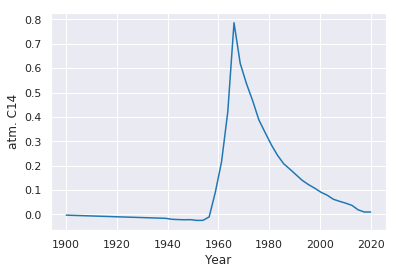

In [5]:
tt = np.linspace(1900, 2020)
plt.plot(tt, C_atm(tt))
plt.xlabel('Year')
plt.ylabel('atm. C14')
plt.show()

# Ploidy

In [6]:
ploidy_data = pd.read_excel('../../data/kudryavtsev_et_al_1993_table_2.xlsx')

In [7]:
ploidy_data['age'] = ploidy_data[['age_min', 'age_max']].mean(axis='columns')
ploidy_data['2C_mean'] /= 100.0
ploidy_data['2C_sem'] /= 100.0

In [8]:
ploidy = sp.interpolate.UnivariateSpline(ploidy_data['age'].values,
                                ploidy_data['2C_mean'].values,
                               ext=3)

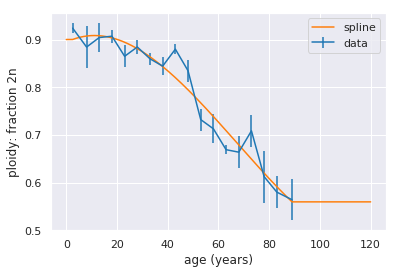

In [9]:
tt = np.linspace(0, 120, 1000)
plt.errorbar(ploidy_data['age'].values, ploidy_data['2C_mean'].values, ploidy_data['2C_sem'].values, label='data')
plt.plot(tt, ploidy(tt), label='spline')
plt.xlabel('age (years)')
plt.ylabel('ploidy: fraction 2n')
plt.legend()
plt.show()

# Read patient data

In [10]:
c14_patient_data = pd.read_pickle('../../results/C14data_liver_samples_20180505.pkl')

In [11]:
c14_patient_data.head()

,type,code,sample,Dbirth,Dcoll,d14C,error_measurement,N_cells,pathology,subject_age,valid
0,unsorted,PH1,ND380,1942.833333,2016.416667,0.078416,0.003981,NaN,N,73.583333,True
1,unsorted,PH2,ND388,1991.416667,2016.833333,0.025254,0.003912,NaN,N,25.416667,True
2,hepatocyte,PH3,ND381,1985.166667,2016.416667,0.040336,0.008788,58.0,N,31.250000,True
3,hepatocyte,PH4,ND382,1982.083333,2016.500000,0.018815,0.005342,52.0,N,34.416667,True
4,hepatocyte,PH6,ND022,1946.500000,2004.833333,0.075001,0.004711,62.0,N,58.333333,True


In [12]:
# exp_data = c14_patient_data.query('valid and type in ["hepatocyte", "hepatocyte 2n", "hepatocyte 4n"]').copy()
# exp_data.head()

In [13]:
# exp_data.describe()

# SSE & log-likelihood

In [14]:
def SSE(p, model, data):
    model_data = model(data['Dbirth'].values, 
                    data['Dcoll'].values, 
                    *p)
    sse = np.sum((model_data - data['d14C'].values)**2)
    return sse    

In [15]:
def Sigma(p, model, data):
    sse = SSE(p, model, data)
    n = len(data)
    sigma = np.sqrt(sse/n)
    return sigma

In [16]:
def Nloglike(p, model, data):
    sse = SSE(p, model, data)
    n = len(data)
    sig = np.sqrt(sse/n)
    loglike = -n/2 * np.log(2*np.pi) - n/2 * np.log(sig**2) - 1 / (2*sig**2) * sse
    return -loglike

In [17]:
def migrad(x0, model, data, error=0.1, limit=None):
    M = iminuit.Minuit.from_array_func(lambda x0: Nloglike(x0, model, data),
                                       x0,
                                       error=error,
                                       limit=limit,
                                       errordef=0.5,
                                       name=iminuit.describe(model.pyfunc)[2:],
                                      print_level=0)
    try:
        M.migrad()
        return M.values.values(), M.errors.values(),  M.fval, M.migrad_ok()
    except:
        return np.nan*np.ones_like(x0), M.errors.values(), np.inf, M.migrad_ok()

In [18]:
memory = joblib.Memory(location=cachedir)

@memory.cache(ignore=['processes'])
def multistart_migrad(modelname, ranges_, dataset, error=0.1, limit=None, n=100, processes=8, seed=42, step_=2):
    global step
    step = step_
    
    data = datasets[dataset]
    
    np.random.seed(seed)
    model = eval(modelname)
    x0s = np.random.uniform(ranges_[0], ranges_[1], (n, len(ranges_[0])))
    fvals = pymp.shared.array((n, ))
    valid = pymp.shared.array((n, ), dtype='bool')
    values = pymp.shared.array((n, len(ranges_[0])))
    perrors = pymp.shared.array((n, len(ranges_[0])))

    with pymp.Parallel(processes) as p:
        for index in p.range(n):
            res = migrad(x0s[index], model, data, error, limit)
            values[index] = tuple(res[0])
            perrors[index] = tuple(res[1])
            fvals[index] = res[2]
            valid[index] = res[3]

    res = pd.DataFrame.from_records((x0s, fvals, values, perrors, valid), 
                                    index=['x0', 'fval', 'values', 'errors', 'valid']).T
    res['fval'] = res['fval'].astype('float')
    res['valid'] = res['valid'].astype('bool')
    res.columns.name = model.pyfunc.__name__
    res['n'] = len(data)
    return res

In [19]:
def summarise(res):
    print(res.columns.name)
    plt.scatter(res['fval'].rank(), res['fval'])
    plt.show()
    best_res = res.loc[res['fval'].idxmin()]
    p_names = iminuit.util.describe(eval(res.columns.name).pyfunc)[2:]
    print('Parameter values')
    for name, value, error in zip(p_names, best_res['values'], best_res['errors']):
        if name.startswith('log'):
            print(f'{name[3:]}: {np.exp(value):.3g} [{np.exp(value-error):.3g}, {np.exp(value+error):.3g}]')
        else:
            print(f'{name}: {value:3g} +- {error:3g}')
    print()
    
    result = pd.Series([-best_res['fval'], len(p_names)+1, best_res['n']], index=['loglike', 'k', 'n'])
    result['cAIC'] = 2 * result['k'] - \
                     2 * result['loglike'] + \
                    (2*result['k']**2 + 2*result['k'])/(result['n']-result['k']-1)
    global results
    try:
        results.loc[res.columns.name] = result
    except:
        results=pd.DataFrame(columns=['loglike', 'k', 'n', 'cAIC'])
        results.loc[res.columns.name] = result
    return results

# Defining the models

## Scenario I1

In [20]:
@np.vectorize
def I1(Dbirth, Dcoll, loglam):
    lam = np.exp(loglam)

    def rhs(t, c):
            return lam * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

## I1T_step

In [21]:
def loglam_step(t, loglam1, loglam2, t_step):
        return np.where(t < t_step, loglam1, loglam2)

@np.vectorize
def I1_loglamfun(Dbirth, Dcoll, loglamfun):
    def rhs(t, c):
            return np.exp(loglamfun(t-Dbirth)) * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

In [22]:
@np.vectorize
def I1T_step(Dbirth, Dcoll, loglam1, loglam2, t_step):   
    return I1_loglamfun(Dbirth, Dcoll, lambda t: loglam_step(t, loglam1, loglam2, t_step))

## I1T_lin

In [23]:
def lam_lin(t, loglam0, mu):
        return np.exp(loglam0) * (1 + mu * t)

@np.vectorize
def I1_lamfun(Dbirth, Dcoll, lamfun):
    def rhs(t, c):
        return lamfun(t-Dbirth) * (C_atm(t) - c)
#             return lamfun(t-Dbirth) * (C_atm(t) - c)

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    return sol.y[-1]

In [24]:
@np.vectorize
def I1T_lin(Dbirth, Dcoll, loglam0, mu):   
    return I1_lamfun(Dbirth, Dcoll, lambda t: lam_lin(t, loglam0, mu))

## Ploidy model

In [25]:
@np.vectorize
def IP(Dbirth, Dcoll, loglam2, loglam4, logk24, logk42):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam4)
    k24 = np.exp(logk24)
    k42 = np.exp(logk42)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def k42_(t):
        return 2 * k42 * (1-ploidy(t-Dbirth)) / ploidy(t-Dbirth)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + k42_(t)) * c2 + k42_(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death, division rate, k42=0

In [26]:
@np.vectorize
def IP_dlk0(Dbirth, Dcoll, loglam):
    lam = np.exp(loglam)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = lam * (C_atm(t) - c2)
        dtc4 = lam * (C_atm(t) - c4) + 0.5*(c2+C_atm(t)-c4)*sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(ploidy(t-Dbirth)-1)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model step - same death, division rate, k42=0

In [27]:
@np.vectorize
def IP_dlk0_loglamfun(Dbirth, Dcoll, loglamfun):
    def lam(t):
        return np.exp(loglamfun(t))
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = lam(t-Dbirth) * (C_atm(t) - c2)
        dtc4 = lam(t-Dbirth) * (C_atm(t) - c4) + 0.5*(c2+C_atm(t)-c4)*sp.misc.derivative(ploidy, t-Dbirth, 0.001)/(ploidy(t-Dbirth)-1)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

In [28]:
@np.vectorize
def IP_dlk0_step(Dbirth, Dcoll, loglam1, loglam2, t_step):   
    return IP_dlk0_loglamfun(Dbirth, Dcoll, lambda t: loglam_step(t, loglam1, loglam2, t_step))

# Optimization

In [29]:
ranges = {}
ranges['I1'] = [(-10, ), (1, )]
ranges['I1T_step'] = [(-10, -10, 0), (1, 1, 100)]
ranges['I1T_lin'] = [(-10, 1e-2), (1, 0.1)]
ranges['IP'] = [(-10, -10, -10, -10), (1, 1, 1, 1)]
ranges['IP_dlk0'] = [(-10, ), (1, )]
ranges['IP_dlk0_step'] = [(-10, -10, 0), (1, 1, 100)]

In [30]:
modelnames = ranges.keys()

In [31]:
errors = {modelname: 0.1 for modelname in modelnames}
errors['I1T_lin'] = [0.1, 1e-3]

In [32]:
limits = {modelname: None for modelname in modelnames}
limits['I1T_lin'] = [None, (-1e-2, 0.1)]
limits['IP'] = [None, None, (None, np.log(0.1)), (None, np.log(0.1))]

In [33]:
datasets = {}
datasets['hepatocytes'] = c14_patient_data.query('valid and type in ["hepatocyte", "hepatocyte 2n", "hepatocyte 4n"]').copy()
datasets['non-hepatocytes'] = c14_patient_data.query('valid and type in ["non-hepatocyte"]').copy()
datasets['hepatocytes_patho'] = c14_patient_data.query('valid and type in ["hepatocyte", "hepatocyte 2n", "hepatocyte 4n"] and pathology=="Y"').copy()
datasets['hepatocytes_nopatho'] = c14_patient_data.query('valid and type in ["hepatocyte", "hepatocyte 2n", "hepatocyte 4n"] and pathology!="Y"').copy()

In [34]:
multistart_result = {condition: {} for condition in datasets.keys()}

In [42]:
for dataset in datasets.keys():
    for modelname in modelnames:
        print(dataset, modelname)
        multistart_result[dataset][modelname] = multistart_migrad(modelname, ranges[modelname], dataset, 
                                                                  error=errors[modelname], limit=limits[modelname], 
                                                                  n=100, step_=2, 
                                                                  processes=7)

hepatocytes I1
hepatocytes I1T_step
hepatocytes I1T_lin
hepatocytes IP
hepatocytes IP_dlk0
hepatocytes IP_dlk0_step
non-hepatocytes I1
non-hepatocytes I1T_step
non-hepatocytes I1T_lin
non-hepatocytes IP
non-hepatocytes IP_dlk0
non-hepatocytes IP_dlk0_step
hepatocytes_patho I1
hepatocytes_patho I1T_step
hepatocytes_patho I1T_lin
hepatocytes_patho IP
hepatocytes_patho IP_dlk0
hepatocytes_patho IP_dlk0_step
hepatocytes_nopatho I1
hepatocytes_nopatho I1T_step
hepatocytes_nopatho I1T_lin
hepatocytes_nopatho IP
hepatocytes_nopatho IP_dlk0
hepatocytes_nopatho IP_dlk0_step


# Results

## Hepatocytes

I1


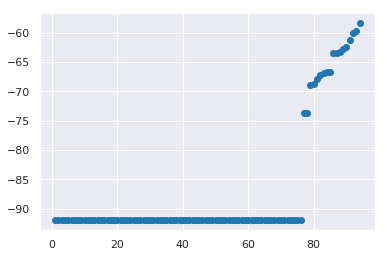

Parameter values
lam: 0.204 [0.185, 0.226]

I1T_step


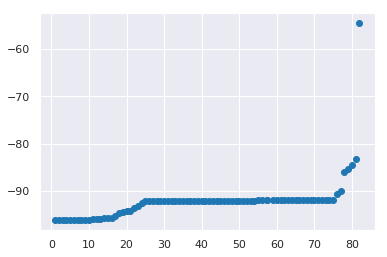

Parameter values
lam1: 0.256 [0.223, 0.295]
lam2: 0.14 [0.122, 0.159]
t_step: 59.0627 +- 0.772559

I1T_lin


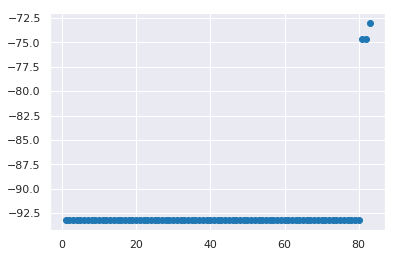

Parameter values
lam0: 0.315 [0.241, 0.412]
mu: -0.00656919 +- 0.00258661

IP


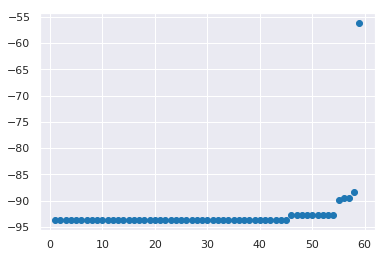

Parameter values
lam2: 0.23 [0.187, 0.283]
lam4: 0.0219 [0.00281, 0.17]
k24: 0.1 [0.0312, 0.321]
k42: 0.1 [0.000278, 35.9]

IP_dlk0


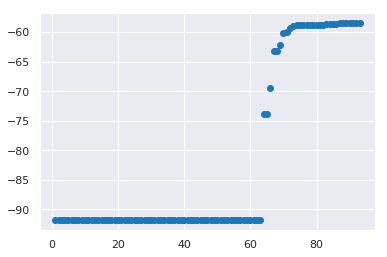

Parameter values
lam: 0.21 [0.191, 0.232]

IP_dlk0_step


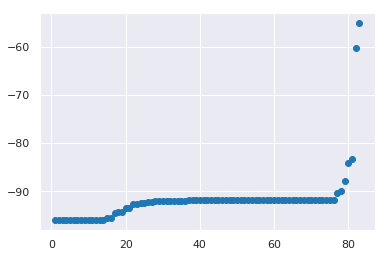

Parameter values
lam1: 0.264 [0.23, 0.304]
lam2: 0.145 [0.127, 0.165]
t_step: 59.0583 +- 0.085931



,loglike,k,n,cAIC
I1T_step,96.175838,4.0,33.0,-182.923105
IP_dlk0_step,96.073061,4.0,33.0,-182.717551
I1T_lin,93.240588,3.0,33.0,-179.653590
I1,91.962861,2.0,33.0,-179.525723
IP_dlk0,91.851107,2.0,33.0,-179.302213
IP,93.730206,5.0,33.0,-175.238190


In [44]:
for modelname in modelnames:
    summarise(multistart_result['hepatocytes'][modelname])
results.sort_values('cAIC')

# Weights and Evidence ratio

In [ ]:
final_results = results.copy()

In [ ]:
final_results['delta'] = final_results['cAIC'] - final_results['cAIC'].min() 
final_results['w'] = np.exp(-0.5*final_results['delta']) / np.exp(-0.5*final_results['delta']).sum()
final_results['ER'] = final_results['w'].max() / final_results['w']
final_results

In [ ]:
final_results = results.loc[['IP', 'IP_dlk0',
       'IP_dlk0_step', 'IP_dl40']]

In [ ]:
final_results['delta'] = final_results['cAIC'] - final_results['cAIC'].min() 
final_results['w'] = np.exp(-0.5*final_results['delta']) / np.exp(-0.5*final_results['delta']).sum()
final_results['ER'] = final_results['w'].max() / final_results['w']
final_results

# Some plots

## Plot I1T_step

In [ ]:
fig, ax = plt.subplots()
tt = np.linspace(0, 100, 100)
ax.plot(tt, )
ax.plot(tt, res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values']
        np.exp(loglam_step(tt, 
                           *res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'])
              ),
        label='step'
       )
ax.set_xlabel('age of person')
ax.set_ylabel('turnover rate (per year)')
ax.legend()
fig.savefig('../../results/plots/sigmoidal_solution.pdf', dpi=300, bboc_inches='tight')
plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 4))
# time = sp.linspace(1930, 2018, 30)

# ax.plot(time, C_atm(time), label='atmospheric $^{14}$C concentration')

# ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls='None',
#         marker='o', label='C14 in DNA', zorder=10)

# for coll in [2005, 2010, 2015, 2020]:
#     ax.plot(time[time<coll-5], 
#             I1T_step(time[time<coll-5], coll, *M_I1T_step.values.values()), label=f'Model (Collection in {coll})')

# plt.xlim(1930, 2018)
# plt.ylim(-0.12, 0.15)

# ax.set_ylabel('$\Delta^{14}$C')

# ax.legend(loc='lower right')
# ax.set_xlabel('Calendar year')

# plt.savefig('../../results/plots/model_prediction_hepatocytes_v1.pdf', bbox_inches='tight', dpi=300)

# plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 4))
# time = sp.linspace(1930, 2018, 30)

# ax.plot(time, C_atm(time), label='atmospheric $^{14}$C concentration')

# ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls='None',
#         marker='o', label='Measured $^{14}$C concentration', zorder=10)

# ax.errorbar(exp_data['Dbirth'],
#            I1T_step(exp_data['Dbirth'], exp_data['Dcoll'], *M_I1T_step.values.values()),
#             Sigma(M_I1T_step.values.values(), I1T_step, exp_data),
#             ls='None', marker='o', label='Best fit'
#            )

# plt.xlim(1930, 2018)
# plt.ylim(-0.05, 0.15)

# ax.set_ylabel('$\Delta^{14}$C')

# ax.legend(loc='lower right')
# ax.set_xlabel('Calendar year')

# plt.savefig('../../results/plots/model_prediction_hepatocytes_v2.pdf', bbox_inches='tight', dpi=300)

# plt.show()

## Plot

In [ ]:
fig, ax = plt.subplots()
tt = np.linspace(0, 100, 100)
ax.plot(tt, 
        lam_lin(tt, *res_I1T_lin.loc[res_I1T_lin['fval'].idxmin(), 'values'])
       )
# ax.plot(tt, res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'],
#         np.exp(loglam_step(tt, 
#                            *res_I1T_step.loc[res_I1T_lin['fval'].idxmin(), 'values'])
#               )
#        )
ax.set_xlabel('age of person')
ax.set_ylabel('turnover rate (per year)')
# fig.savefig('../../results/plots/sigmoidal_solution.pdf', dpi=300, bboc_inches='tight')
plt.show()

## Plot I1, I1T, I1_memory

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
tt = np.linspace(1930, 2020)
ax.plot(tt, np.vectorize(c14_models.C_atm)(tt))
ax.plot(exp_data['Dbirth'], exp_data['d14C'], ls = 'None', marker = 'o')

# ax.errorbar(exp_data['Dbirth']-0.4, 
#             I1(exp_data['Dbirth'].values,
#                exp_data['Dcoll'].values,
#                *res_I1.x
#                ),
#            Sigma(res_I1.x, I1, exp_data),
#            ls='None',
#             marker='s',
#            label = 'I1')

ax.errorbar(exp_data['Dbirth'], 
            I1T_step(exp_data['Dbirth'].values,
                          exp_data['Dcoll'].values,
                          *res_I1T_step.x
                         ),
           0*Sigma(res_I1T_step.x, I1T_step, exp_data),
           ls='None',
            marker='s',
           label = 'I1T_step')

# ax.errorbar(exp_data['Dbirth']+0.4, 
#              I1_memory(exp_data['Dbirth'], 
#                       exp_data['Dcoll'],
#                       *res_I1_memory.x),
#              Sigma(res_I1_memory.x, I1_memory, exp_data),
#              ls = 'None',
#             marker='o',
#            label='I1_memory')


ax.set_ylim((0, 0.12))
ax.legend()
plt.show()

# Other models

## Ploidy model - same death rate

In [ ]:
@np.vectorize
def IP_d(Dbirth, Dcoll, loglam2, loglam4, logk24):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam4)
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24 + (lam2-lam4)*(ploidy(t-Dbirth)-1))
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death, division rate

In [ ]:
@np.vectorize
def IP_dl(Dbirth, Dcoll, loglam2, logk24):
    lam2 = np.exp(loglam2)
    lam4 = np.exp(loglam2)
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## Ploidy model - same death, $\lambda_4=0$

In [ ]:
@np.vectorize
def IP_dl40(Dbirth, Dcoll, loglam2, logk24):
    lam2 = np.exp(loglam2)
    lam4 = 0
    k24 = np.exp(logk24)
    
    def k24_(t):
        return 0.5 * k24 * ploidy(t-Dbirth) / (1-ploidy(t-Dbirth))
    def f(t):
        return 2/(2-ploidy(t-Dbirth))*(sp.misc.derivative(ploidy, t-Dbirth, 0.001)/ploidy(t-Dbirth) + k24)
    
    def rhs(t, c):
        c2 = c[0]
        c4 = c[1]
        dtc2 = -(lam2 + f(t)) * c2 + f(t) * c4 + lam2 * C_atm(t)
        dtc4 = -(lam4 + 2*k24_(t)) * c4 + k24_(t) * c2 + (lam4+k24_(t)) * C_atm(t)
        return [dtc2, dtc4]

    C_init = C_atm(Dbirth)
    
    sol = sp.integrate.solve_ivp(fun=rhs,
                                 t_span=(Dbirth, Dcoll),
                                 t_eval=[Dcoll],
                                 y0=[C_init, C_init],
                                vectorized=True,
                                max_step=step,
                                first_step=step,
                                rtol=np.inf,
                                atol=np.inf,
                                method='RK45')
    c2, c4 = sol.y[:,0]
    p = ploidy(Dcoll-Dbirth)
    
    return np.average([c2, c4], weights=[p, 2*(1-p)])

## I1 Memory

In [ ]:
@np.vectorize
def I1_memory(Dbirth, Dcoll, loglam, f, t0):
    lam = np.exp(loglam)
    C1 = c14_models.I1c(Dbirth, Dcoll, lam)
    
    if t0>Dcoll-Dbirth:
        return C1
    else:
        C0 = c14_models.I1c(Dbirth, Dbirth + t0, lam)
        return f*C1 + (1-f)*C0

## I1 Memory Interval

In [ ]:
@np.vectorize
def I1_memory_interval(Dbirth, Dcoll, loglam, f, t0, t1):
    if f >= 1:
        f = 1
    if t0 < 0.1:
        t0 = 0.1
    if t1 < 0.1:
        t1 = 0.1
    lam = np.exp(loglam)
    C1 = c14_models.I1c(Dbirth, Dcoll, lam)
    C0 = C1
    
    if Dbirth + t0 >= Dcoll:
        C0 = C1
    elif Dbirth + t0 + t1 >= Dcoll:
        C0 = np.mean(np.vectorize(c14_models.I1c)(Dbirth, np.arange(Dbirth + t0, Dcoll, 1), lam))
    else:
        C0 = np.mean(np.vectorize(c14_models.I1c)(Dbirth, np.arange(Dbirth + t0, Dbirth + t0 + t1, 1), lam))
    return f*C1 + (1-f)*C0

## I1T_sigmoid

In [ ]:
I1T = c14_models.I1T

In [ ]:
@np.vectorize
def I1T_sigmoid(Dbirth, Dcoll, loglam1, loglam2, t_step, n):
    lam1 = np.exp(loglam1)
    lam2 = np.exp(loglam2)
    
    if n > 20:
        n = 20
    if n < 0.5:
        n = 0.5
    def lam_sigmoid(t, lam1, lam2, t_step, n):
        return lam1 + (lam2 - lam1) * (t-Dbirth)**n / (t_step**n + (t-Dbirth)**n)
    
    return I1T(Dbirth, Dcoll, lam_sigmoid, t_eval=np.linspace(Dbirth, Dcoll), lam_arg=(lam1, lam2, t_step, n))[1][-1]

## I1T_linear

In [ ]:
I1T = c14_models.I1T

In [ ]:
@np.vectorize
def I1T_linear(Dbirth, Dcoll, loglam0, r):
    lam0 = np.exp(loglam0)
    r = np.tanh(tanr)
        
    def lam_linear(t, lam0, r):
        if lam0 + r*(t-Dbirth) > 0:
            return lam0 + r*t
        else:
            return 0
    
    return I1T(Dbirth, Dcoll, lam_linear, t_eval=np.linspace(Dbirth, Dcoll), lam_arg=(lam0, r))[1][-1]

## I1T_transient

In [ ]:
@np.vectorize
def I1T_transient(Dbirth, Dcoll, loglam1, loglam2, t_on, t_off):
    lam1 = np.exp(loglam1)
    lam2 = np.exp(loglam2)
    
    def lam_transient(t, lam1, lam2, t_on, t_off):
        return np.where(np.logical_or(t < Dbirth + t_on,
                                      t > Dbirth + t_on + t_off),
                        lam1, 
                        lam2)
    
    return I1T(Dbirth, Dcoll, lam_transient, 
               t_eval=np.linspace(Dbirth, Dcoll), 
               lam_arg=(lam1, lam2, t_on, t_off)
              )[1][-1]

## I2

In [ ]:
@np.vectorize
def I2(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.I2(Dbirth, Dcoll, lam, f, 
                         t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## IK

In [ ]:
@np.vectorize
def IK(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.IK(Dbirth, Dcoll, lam, f, t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## IL

In [ ]:
@np.vectorize
def IL(Dbirth, Dcoll, loglam, f):
    lam = np.exp(loglam)
    return c14_models.IL(Dbirth, Dcoll, lam, f, t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

## Scenario IX2p

In [ ]:
@np.vectorize
def IX2p(Dbirth, Dcoll, dloglam1, dloglam2, f1):
    dlam1 = np.exp(dloglam1)
    dlam2 = np.exp(dloglam2)
    
    f2 = 1-f1
    
    return c14_models.IX(Dbirth, Dcoll, [dlam1, dlam2], [f1, f2],
                        t_eval=np.linspace(Dbirth, Dcoll))[1][-1]

In [ ]:
results.sort_values('cAIC')